## Main

In this file all the main functions are called to show the results of our work. For this purpose, the following python-libraries: <b> numpy</b>, <b>matplotlib</b>, <b>import_ipynb</b>, <b>typing</b>, <b>collections</b> and <b> functools</b>  must be included. Among them are self-implemented files like <b>rk4</b> and <b>analysis</b> with the needed functions. 

At the beginning of the file all needed parameters are being declared and provided with default values. They are splitted in: <b>model</b> parameters and <b>simulation</b> parameters. Parameters for the infection, awareness and the sensitivity analysis can be adjust in the model.
The final output of the main functions (plots) of this project are displayed in the <b> documentation.ipynb</b> file and in the <b> figures</b> folder.

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

In [2]:
from typing import Union
from collections.abc import Callable
from functools import partial

In [3]:
# local imports
from rk4 import rk4
from analysis import run_sensitivity_sweep, run_information_simulation, run_simulation
from plots import plot_evolution, plot_evolution_comparison, plot_awareness_compartments, plot_awareness, plot_sensitivity_sweep

importing Jupyter notebook from rk4.ipynb
importing Jupyter notebook from analysis.ipynb
importing Jupyter notebook from awareness.ipynb
importing Jupyter notebook from input_output.ipynb
importing Jupyter notebook from plots.ipynb


## Model Parameters

In [4]:
# model parameters

# infections

# default: beta=0.03, gamma=0.03
beta0  = 0.03  # virus transmission rate between two individuals
gamma0 = 0.03  # recovery rate

infection_params = [beta0, gamma0]

# awareness

# default values: alpha=0.06, omega=0.06, lamb=0.05, rho=0.6, kappa=0.7
alpha0 = 0.06  # awareness transmission
omega0 = 0.06  # awareness creation
lam0   = 0.05  # awareness fading over time
rho0   = 0.6   # susceptibility reduction (rh0=0.9 means 90% reduction for first level, 81% reduction for second level etc.)
kappa0 = 0.7   # self isolation (kappa=0.8 means 80% reduction through isolation)

awareness_params = [alpha0, omega0, lam0, rho0, kappa0]
awareness_params_no_awareness = [0, 0, 0, 0, 0]

# variation for sensitivity analysis

k = 6  # number of points to evaluate

# rates (multiplied by a factor)
alpha = np.geomspace(0.5, 2, k)*alpha0
omega = np.geomspace(0.5, 2, k)*omega0
lam = np.geomspace(0.5, 2, k)*lam0

# other parameters between zero and one (absolute values)
rho = np.linspace(0.1, 0.9, k)
kappa = np.linspace(0.1, 0.9, k)

awareness_params_variation = [alpha, omega, lam, rho, kappa]



In [5]:
# simulation parameters

grid_size = 30  # length of square grid
info_compartments = 10  # number of awareness compartments, susceptibility is [0, 1-rho, 1-rho^2, ... 1]

t0 = 0
tmax = 1000
n0 = tmax

t = np.linspace(t0, tmax, n0+1)

simulation_params = [grid_size, info_compartments, t]

## Simulations

#### Awareness without Infections

In [ ]:
# simulate how awareness spreads throughout the network and decreases over time
run_information_simulation(infection_params, awareness_params, simulation_params)

{'alpha': 0.06, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}


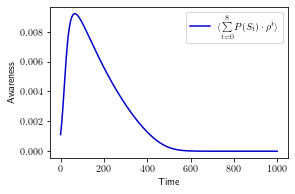

In [ ]:
# plot how much awareness spreads throughout the network and decreases over time
plot_awareness()

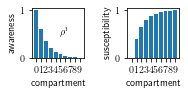

In [6]:
# plot how much awareness and susceptibility is assumed for each compartment
plot_awareness_compartments(awareness_params, simulation_params, figsize=(2.8, 1.4))

#### Without Awareness

In [ ]:
# run simulation for spread without awareness
run_simulation(infection_params, awareness_params_no_awareness, simulation_params, name='no_awareness')

{'alpha': 0, 'omega': 0, 'lam': 0, 'rho': 0, 'kappa': 0}


S :  0.9988888888888889 0.18349574282509556 0.025173747036351654
I :  0.0011111111111111111 0.21260351279251227 3.633999538586519e-10
R :  0.0 0.6039007443823919 0.9748262526002478


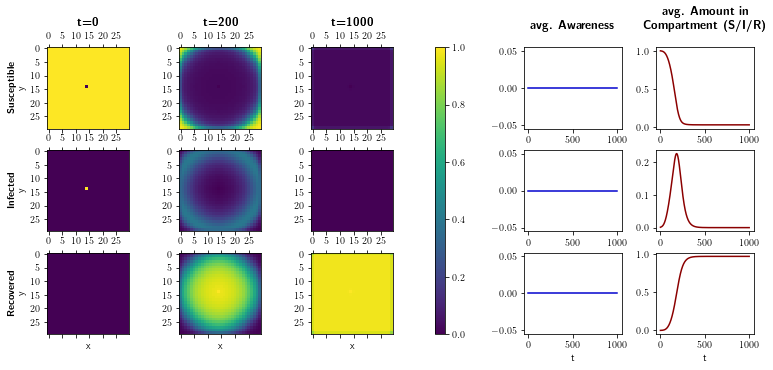

In [ ]:
# plot spread without awareness
figsize=(10.5, 5)
plot_evolution(awareness_params_no_awareness, name='no_awareness', tm=200, figsize=figsize)

#### With Awareness

In [ ]:
# run simulation for spread with awareness
run_simulation(infection_params, awareness_params, simulation_params, name='default')


{'alpha': 0.06, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}


S :  0.9988888888888889 0.7484068987363648 0.27296482966765795
I :  0.0011111111111111111 0.08365594677779549 3.522040368979418e-05
R :  0.0 0.16793715448583962 0.7269999499286534


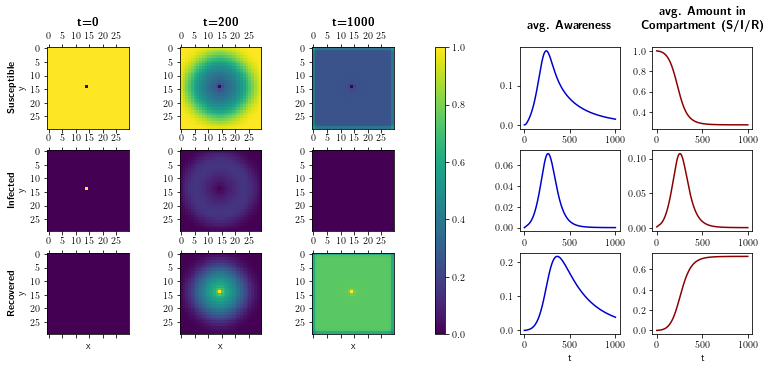

In [ ]:
# plot spread with awareness
figsize=(10.5, 5)
plot_evolution(awareness_params, name='default', tm=200, figsize=figsize)

#### Comparison with and without Awareness

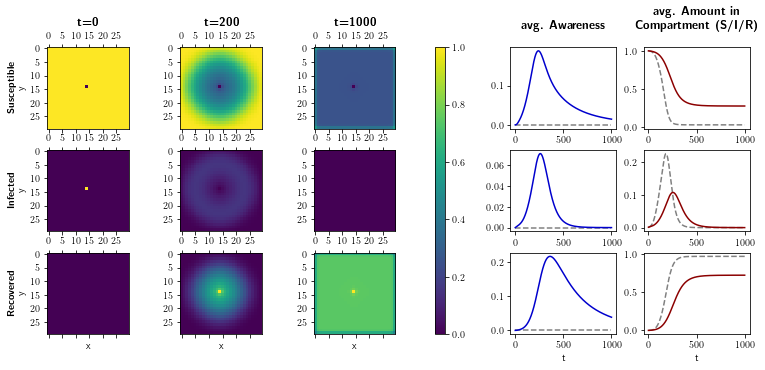

In [ ]:
# compare spread with and without awareness
figsize=(10.5, 5)
plot_evolution_comparison([awareness_params_no_awareness, awareness_params], names=['no_awareness', 'default'], tm=200, figsize=figsize)

#### Long Term with Awareness

In [ ]:
# run simulation for spread with awareness for longer time
t_extended = np.linspace(t0, 5000, 5001)
simulation_params_extended = [grid_size, info_compartments, t_extended]




In [ ]:
# run simulation
run_simulation(infection_params, awareness_params, simulation_params_extended, name='default_extended')

{'alpha': 0.06, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}


S :  0.9988888888888889 0.7482767091644963 0.27288551385167964
I :  0.0011111111111111111 0.08368571132456198 4.246679248375458e-19
R :  0.0 0.1680375795109415 0.7271144861483205


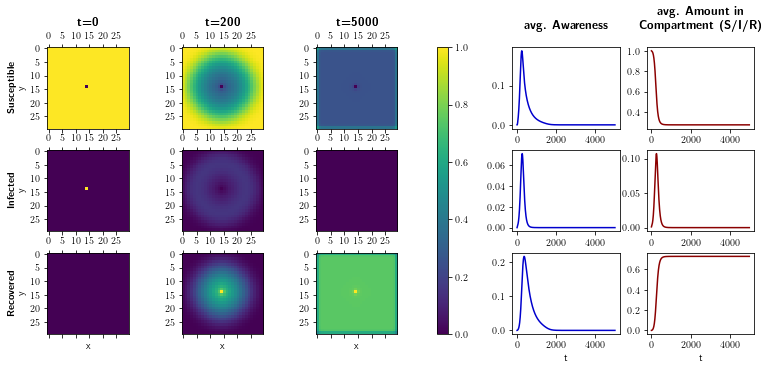

In [ ]:
# plot spread with awareness over a longer period in time
figsize=(10.5, 5)
plot_evolution(awareness_params, name='default_extended', tm=200, figsize=figsize)

#### Long term with Aggressive Awareness

In [ ]:
# run simulation with more aggressive awareness parameters

# default values: alpha=0.06, omega=0.06, lamb=0.05, rho=0.6, kappa=0.7
alpha0_aggr = 0.03  # awareness transmission
omega0_aggr = 0.03  # awareness creation
lam0_aggr   = 0.03  # awareness fading over time
rho0_aggr   = 0.8   # susceptibility reduction (rh0=0.9 means 90% reduction for first level, 81% reduction for second level etc.)
kappa0_aggr = 0.8   # self isolation (kappa=0.8 means 80% reduction through isolation)

awareness_params_aggr = [alpha0_aggr, omega0_aggr, lam0_aggr, rho0_aggr, kappa0_aggr]

t_extended = np.linspace(t0, 2000, 2001)
simulation_params_extended = [grid_size, info_compartments, t_extended]



In [ ]:
# run simulation
run_simulation(infection_params, awareness_params_aggr, simulation_params_extended, name='aggressive')

{'alpha': 0.03, 'omega': 0.03, 'lam': 0.03, 'rho': 0.8, 'kappa': 0.8}


In [ ]:
# plot spread with aggressive awareness
figsize=(10.5, 5)
plot_evolution(awareness_params_aggr, name='aggressive', tm=200, figsize=figsize)

NameError: name 'awareness_params_aggr' is not defined

#### Long Term with Awareness Drop

In [ ]:
# run simulation with more aggressive awareness parameters but reduce awareness after t=1000

t_extended = np.linspace(0, 2000, 2001)
simulation_params_extended = [grid_size, info_compartments, t_extended]

# default values: alpha=0.06, omega=0.06, lamb=0.05, rho=0.6, kappa=0.7
alpha0_aggr_t = 0.03*np.ones(len(t_extended))  # awareness transmission
omega0_aggr_t = 0.03*np.ones(len(t_extended))  # awareness creation
lam0_aggr_t   = 0.03*np.ones(len(t_extended))  # awareness fading over time
rho0_aggr_t   = 0.8*np.ones(len(t_extended))   # susceptibility reduction (rh0=0.9 means 90% reduction for first level, 81% reduction for second level etc.)
kappa0_aggr_t = 0.8*np.ones(len(t_extended))   # self isolation (kappa=0.8 means 80% reduction through isolation)

alpha0_aggr_t[1000:] *= 0.1
omega0_aggr_t[1000:] *= 0.1
lam0_aggr_t[1000:] *= 10

awareness_params_aggr_t = [alpha0_aggr_t, omega0_aggr_t, lam0_aggr_t, rho0_aggr_t, kappa0_aggr_t]





In [ ]:
run_simulation(infection_params, awareness_params_aggr_t, simulation_params_extended, name='aggressive_with_awareness_drop')

{'alpha': array([0.03 , 0.03 , 0.03 , ..., 0.003, 0.003, 0.003]), 'omega': array([0.03 , 0.03 , 0.03 , ..., 0.003, 0.003, 0.003]), 'lam': array([0.03, 0.03, 0.03, ..., 0.3 , 0.3 , 0.3 ]), 'rho': array([0.8, 0.8, 0.8, ..., 0.8, 0.8, 0.8]), 'kappa': array([0.8, 0.8, 0.8, ..., 0.8, 0.8, 0.8])}


S :  0.9988888888888889 0.7129707162471238 0.13428824327700098
I :  0.0011111111111111111 0.08608069910896839 8.674644752210974e-06
R :  0.0 0.20094858464390808 0.8657030820782462


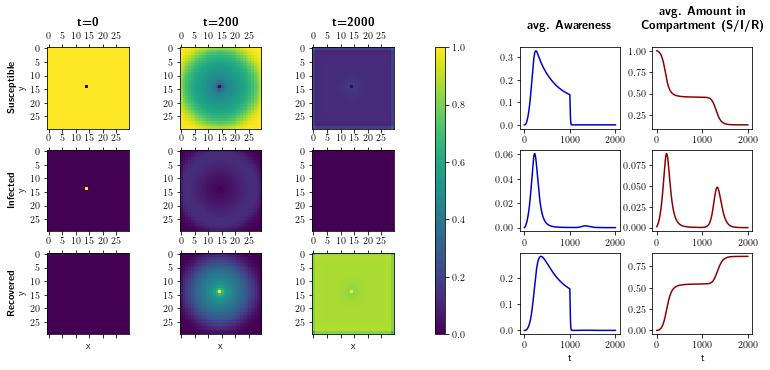

In [ ]:
# plot spread with aggressive awareness when awareness is suddenly reduced 
figsize=(10.5, 5)
plot_evolution(awareness_params_aggr_t, name='aggressive_with_awareness_drop', tm=200, figsize=figsize)

#### Sensitivity Analysis

In [ ]:
## sensitivity analysis

# prepare sensitivity analysis
t_reduced = np.linspace(0, 350, 351)

# default params, reduce simulation time
simulation_params_sweep = [grid_size, info_compartments, t_reduced]

# run sensitivity analysis
run_sensitivity_sweep(infection_params, awareness_params, awareness_params_variation,\
    simulation_params_sweep, folder='data/sweep_default')

1/31:   {'alpha': 0.06, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
2/31:   {'alpha': 0.03, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
3/31:   {'alpha': 0.03958523732318683, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
4/31:   {'alpha': 0.05223303379776745, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
5/31:   {'alpha': 0.0689219012998221, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
6/31:   {'alpha': 0.09094299399062389, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
7/31:   {'alpha': 0.12, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
8/31:   {'alpha': 0.06, 'omega': 0.03, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
9/31:   {'alpha': 0.06, 'omega': 0.03958523732318683, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
10/31:   {'alpha': 0.06, 'omega': 0.05223303379776745, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
11/31:   {'alpha': 0.06, 'omega': 0.0689219012998221, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
12/31:   {'alpha': 0.06, 'omega': 0.0

alpha [0.03, 0.03958523732318683, 0.05223303379776745, 0.0689219012998221, 0.09094299399062389, 0.12] [0.1325608058806156, 0.12277872478020385, 0.11244257506914153, 0.10219267694693397, 0.09246656617988877, 0.0834866876716378]
omega [0.03, 0.03958523732318683, 0.05223303379776745, 0.0689219012998221, 0.09094299399062389, 0.12] [0.14739837349608043, 0.1326288931076823, 0.11607062609729175, 0.09826241994782456, 0.08011184765488237, 0.06276281712140008]
lam [0.025, 0.03298769776932236, 0.043527528164806206, 0.05743491774985176, 0.07578582832551992, 0.1] [0.07190431444080049, 0.08494363096745555, 0.09955358111461736, 0.11515583489886787, 0.1310463666444367, 0.1464926555971383]
rho [0.1, 0.26, 0.42000000000000004, 0.58, 0.74, 0.9] [0.16670157124970464, 0.15780254412439707, 0.14197423928571884, 0.11248040296149149, 0.05781136350702821, 0.0028817098297541114]
kappa [0.1, 0.26, 0.42000000000000004, 0.58, 0.74, 0.9] [0.16594114904346757, 0.15196986333589807, 0.1368323181322467, 0.12043853010047

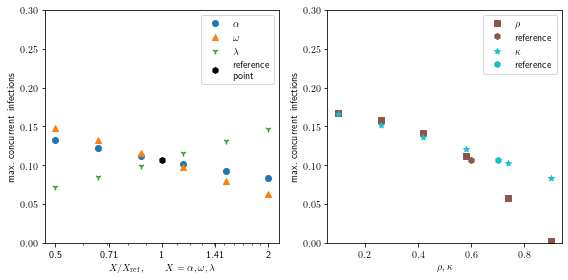

In [ ]:
# plot the sensitivity analysis
plot_sensitivity_sweep(folder='data/sweep_default', fname='figures/sweep_default.png')

#### Sensitivity Analysis (information based scenario)

In [ ]:
# sensitivity analysis at point where the reduction is information based

t_reduced = np.linspace(0, 350, 351)
simulation_params_sweep = [grid_size, info_compartments, t_reduced]

k = 4  # number of points to evaluate (reduced)

lam = np.geomspace(0.5, 2, k)*lam0
rho = np.linspace(0.1, 0.9, k)
kappa = np.linspace(0.1, 0.9, k)

alpha0_info_based = 0.1
omega0_info_based = 0.001
awareness_params_info_based = [alpha0_info_based, omega0_info_based, lam0, rho0, kappa0]

alpha_info_based = np.geomspace(0.5, 2, k)*alpha0_info_based
omega_info_based = np.geomspace(0.5, 2, k)*omega0_info_based


awareness_params_variation_info_based = [alpha_info_based, omega_info_based, lam, rho, kappa]

run_sensitivity_sweep(infection_params, awareness_params_info_based, awareness_params_variation_info_based,\
    simulation_params_sweep, folder='data/sweep_information_based')

1/21:   {'alpha': 0.1, 'omega': 0.001, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
2/21:   {'alpha': 0.05, 'omega': 0.001, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
3/21:   {'alpha': 0.07937005259840997, 'omega': 0.001, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
4/21:   {'alpha': 0.12599210498948732, 'omega': 0.001, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
5/21:   {'alpha': 0.2, 'omega': 0.001, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
6/21:   {'alpha': 0.1, 'omega': 0.0005, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
7/21:   {'alpha': 0.1, 'omega': 0.0007937005259840997, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
8/21:   {'alpha': 0.1, 'omega': 0.0012599210498948732, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
9/21:   {'alpha': 0.1, 'omega': 0.002, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
10/21:   {'alpha': 0.1, 'omega': 0.001, 'lam': 0.025, 'rho': 0.6, 'kappa': 0.7}
11/21:   {'alpha': 0.1, 'omega': 0.001, 'lam': 0.039685026299204985, 'rho': 0.6, 'kappa': 0.7}
12/21:   {'alpha': 0.1, 'omega': 0.001, 'lam': 0.06299605

alpha [0.05, 0.07937005259840997, 0.12599210498948732, 0.2] [0.21901004359805482, 0.2125380911760235, 0.20285384623545205, 0.19120193946627706]
omega [0.0005, 0.0007937005259840997, 0.0012599210498948732, 0.002] [0.21288987904143747, 0.2098450751794594, 0.2060373464716192, 0.2012167249122494]
lam [0.025, 0.039685026299204985, 0.06299605249474366, 0.1] [0.20086049553922253, 0.20548665563226373, 0.21069762418172946, 0.21589195920163476]
rho [0.1, 0.3666666666666667, 0.6333333333333333, 0.9] [0.2245699591134429, 0.22179342902787066, 0.20339551840896772, 0.041273631083254006]
kappa [0.1, 0.3666666666666667, 0.6333333333333333, 0.9] [0.20907589507277224, 0.20862589109755117, 0.20816786381100855, 0.20770179165554908]


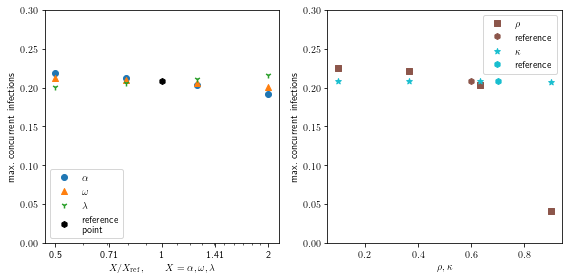

In [ ]:
# plot the sensitivity analysis
plot_sensitivity_sweep(folder='data/sweep_information_based', fname='figures/sweep_information_based.png')

#### Sensitivity Analysis (detection based scenario)

In [ ]:
# sensitivity analysis at point where the reduction is detection based

t_reduced = np.linspace(0, 350, 351)
simulation_params_sweep = [grid_size, info_compartments, t_reduced]

k = 4  # number of points to evaluate (reduced)

lam = np.geomspace(0.5, 2, k)*lam0
rho = np.linspace(0.1, 0.9, k)
kappa = np.linspace(0.1, 0.9, k)

alpha0_detection_based = 0.001
omega0_detection_based = 0.1
awareness_params_detection_based = [alpha0_detection_based, omega0_detection_based, lam0, rho0, kappa0]

alpha_detection_based = np.geomspace(0.5, 2, k)*alpha0_detection_based
omega_detection_based = np.geomspace(0.5, 2, k)*omega0_detection_based

awareness_params_variation_detection_based = [alpha_detection_based, omega_detection_based, lam, rho, kappa]

run_sensitivity_sweep(infection_params, awareness_params_detection_based, awareness_params_variation_detection_based,\
    simulation_params_sweep, folder='data/sweep_detection_based')

1/21:   {'alpha': 0.001, 'omega': 0.1, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
2/21:   {'alpha': 0.0005, 'omega': 0.1, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
3/21:   {'alpha': 0.0007937005259840997, 'omega': 0.1, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
4/21:   {'alpha': 0.0012599210498948732, 'omega': 0.1, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
5/21:   {'alpha': 0.002, 'omega': 0.1, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
6/21:   {'alpha': 0.001, 'omega': 0.05, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
7/21:   {'alpha': 0.001, 'omega': 0.07937005259840997, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
8/21:   {'alpha': 0.001, 'omega': 0.12599210498948732, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
9/21:   {'alpha': 0.001, 'omega': 0.2, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
10/21:   {'alpha': 0.001, 'omega': 0.1, 'lam': 0.025, 'rho': 0.6, 'kappa': 0.7}
11/21:   {'alpha': 0.001, 'omega': 0.1, 'lam': 0.039685026299204985, 'rho': 0.6, 'kappa': 0.7}
12/21:   {'alpha': 0.001, 'omega': 0.1, 'lam': 0.06299605

alpha [0.0005, 0.0007937005259840997, 0.0012599210498948732, 0.002] [0.14057585224334787, 0.14012734868578233, 0.1394092773158082, 0.1382555176474818]
omega [0.05, 0.07937005259840997, 0.12599210498948732, 0.2] [0.17754007804390104, 0.15400456376317073, 0.12444424807682042, 0.09282589557187762]
lam [0.025, 0.039685026299204985, 0.06299605249474366, 0.1] [0.12253451918453724, 0.13357941406572077, 0.14638434918659593, 0.16005860574819747]
rho [0.1, 0.3666666666666667, 0.6333333333333333, 0.9] [0.14122714527449956, 0.1407446229997416, 0.13959991318938594, 0.13611211188476335]
kappa [0.1, 0.3666666666666667, 0.6333333333333333, 0.9] [0.21542921606273763, 0.18687007425504826, 0.1505411315854676, 0.10236074987197752]


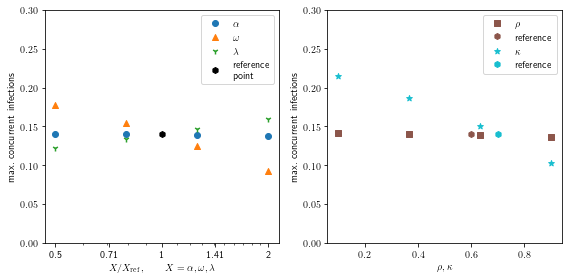

In [ ]:
# plot the sensitivity analysis
plot_sensitivity_sweep(folder='data/sweep_detection_based', fname='figures/sweep_detection_based.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac0f8ce2-3132-47be-a4d1-6216636e93ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>